In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Extract Time Data into categories

In [ ]:
# Create a dataset with a few dates
data = {'dates': ['2023-01-15', '2022-12-10', '2024-07-23', '2021-03-30', '2020-08-17']}
df = pd.DataFrame(data)

# Convert the 'dates' column to datetime format
df['dates'] = pd.to_datetime(df['dates'])

# Extract day, month, and year into separate columns
df['day'] = df['dates'].dt.day
df['month'] = df['dates'].dt.month
df['year'] = df['dates'].dt.year

# Display the dataframe
df

,dates,day,month,year
0,2023-01-15,15,1,2023
1,2022-12-10,10,12,2022
2,2024-07-23,23,7,2024
3,2021-03-30,30,3,2021
4,2020-08-17,17,8,2020


In [ ]:
df=pd.read_csv(r"C:\Users\ophir\OneDrive\Desktop\Amsterdam_Example.csv")
df=df.dropna()
df.head()

,latitude,longitude,summary,property_type,review_scores_rating,bedrooms,price,host_neighbourhood,sale price
0,52.365755,4.941419,Quiet Garden View Room & Super Fast WiFi,Apartment,97.0,1.0,59,Indische Buurt,5900000
1,52.390225,4.873924,You will love our spacious (90 m2) bright apar...,Apartment,96.0,2.0,160,Spaarndammer en Zeeheldenbuurt,16000000
2,52.365087,4.893541,"Cozy studio on your own private floor, 100% in...",Townhouse,87.0,1.0,80,Grachtengordel,8000000
4,52.386727,4.892078,Stylish and romantic houseboat on fantastic hi...,Houseboat,99.0,1.0,150,Westelijke Eilanden,15000000
5,52.375342,4.857289,2 beds guest room in Amsterdam West near Erasm...,Apartment,93.0,1.0,65,Bos en Lommer,6500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 0 to 6036
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              3910 non-null   float64
 1   longitude             3910 non-null   float64
 2   summary               3910 non-null   object 
 3   property_type         3910 non-null   object 
 4   review_scores_rating  3910 non-null   float64
 5   bedrooms              3910 non-null   float64
 6   price                 3910 non-null   int64  
 7   host_neighbourhood    3910 non-null   object 
 8   sale price            3910 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 305.5+ KB


# Data Standarization (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize using Min-Max Scaling for Values 0-1
scaler = MinMaxScaler()
df['sale price in M'] = scaler.fit_transform(df[['sale price']])
df.head()

,latitude,longitude,summary,property_type,review_scores_rating,bedrooms,price,host_neighbourhood,sale price,sale price in M
0,52.365755,4.941419,Quiet Garden View Room & Super Fast WiFi,Apartment,97.0,1.0,59,Indische Buurt,5900000,0.006932
1,52.390225,4.873924,You will love our spacious (90 m2) bright apar...,Apartment,96.0,2.0,160,Spaarndammer en Zeeheldenbuurt,16000000,0.029517
2,52.365087,4.893541,"Cozy studio on your own private floor, 100% in...",Townhouse,87.0,1.0,80,Grachtengordel,8000000,0.011628
4,52.386727,4.892078,Stylish and romantic houseboat on fantastic hi...,Houseboat,99.0,1.0,150,Westelijke Eilanden,15000000,0.027281
5,52.375342,4.857289,2 beds guest room in Amsterdam West near Erasm...,Apartment,93.0,1.0,65,Bos en Lommer,6500000,0.008274


# MAP

In [ ]:
import pandas as pd
#!pip install folium
import folium
from folium.plugins import MarkerCluster

In [ ]:
#Interactive Map of Listings in Berlin
#!pip install folium
import folium
from folium.plugins import FastMarkerCluster
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

In [ ]:
# Create a base map
map1 = folium.Map(location=[52.3676, 4.9041], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map1)
map1

# WORD CLOUD

In [ ]:
#creating a word cloud using costumers reviews

In [ ]:
#!pip install nltk
import nltk
from wordcloud import WordCloud

In [ ]:
#loading the text_df
text=df['summary'].astype('string')
text

0                Quiet Garden View Room & Super Fast WiFi
1       You will love our spacious (90 m2) bright apar...
2       Cozy studio on your own private floor, 100% in...
4       Stylish and romantic houseboat on fantastic hi...
5       2 beds guest room in Amsterdam West near Erasm...
                              ...                        
6032    Bright, clean and modern apartment located in ...
6033    Light and modern appartment, room for up to 5 ...
6034    This apartment is perfect for two! The apartme...
6035    We rent out our house in the week 28 dec - 4 j...
6036    This recently renovated luxurious apartment is...
Name: summary, Length: 3910, dtype: string

In [ ]:
text.info()

<class 'pandas.core.series.Series'>
Index: 3910 entries, 0 to 6036
Series name: summary
Non-Null Count  Dtype 
--------------  ----- 
3910 non-null   string
dtypes: string(1)
memory usage: 61.1 KB


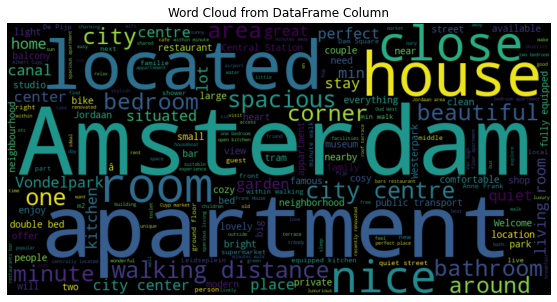

In [ ]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame Column")
plt.show()

Agg of Apartments by number of bedrooms

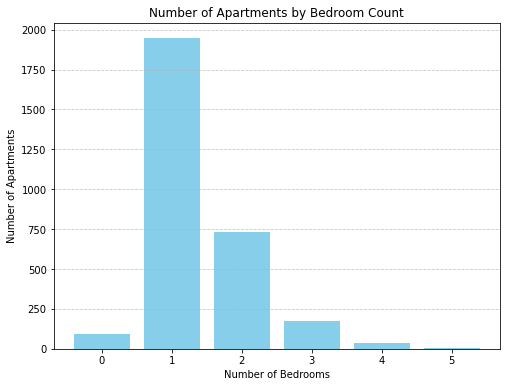

In [ ]:


# Filter only rows with property_type as 'Apartment'
apartments_df = df[df['property_type'] == 'Apartment']

# Group by 'bedrooms' and aggregate the data
aggregated_apartments = apartments_df.groupby('bedrooms').size().reset_index(name='count')
# Plot the aggregated data
plt.figure(figsize=(8, 6))
plt.bar(aggregated_apartments['bedrooms'], aggregated_apartments['count'], color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Apartments')
plt.title('Number of Apartments by Bedroom Count')
plt.xticks(aggregated_apartments['bedrooms'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average price by Number of Bedrooms

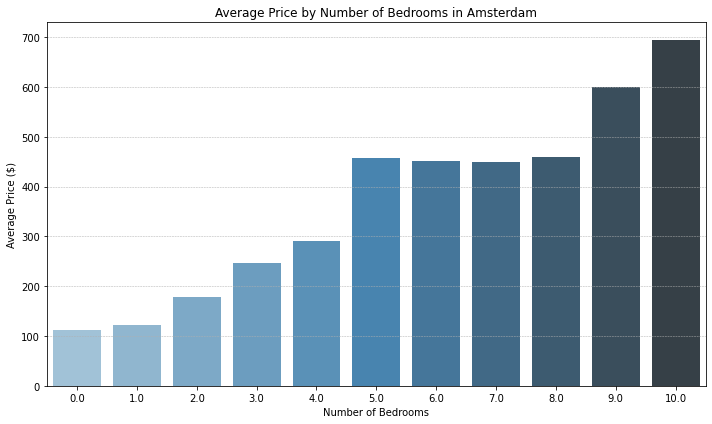

In [ ]:
# Convert price to numeric, remove the '$' and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculating the average price by the number of bedrooms
average_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().reset_index()

# Plotting the average price by the number of bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_bedrooms, x='bedrooms', y='price', palette='Blues_d')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Number of Bedrooms in Amsterdam')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

# Counts by Neighbourhood

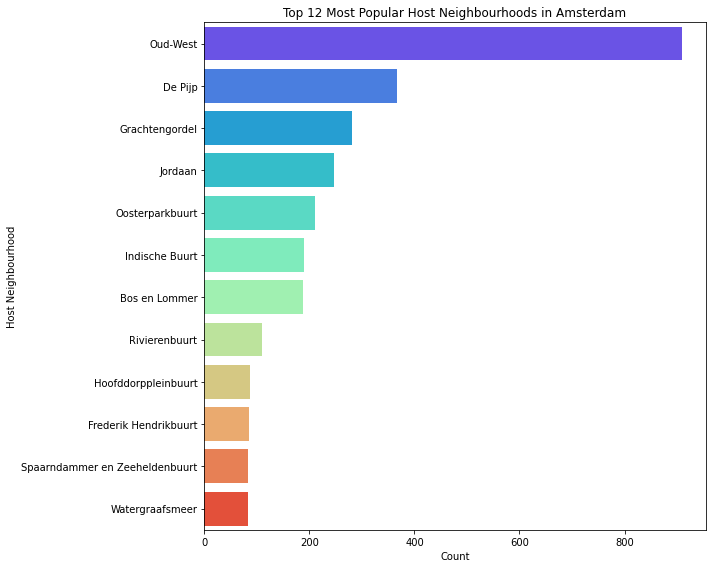

In [ ]:
# Counting occurrences of each neighbourhood
neighbourhood_counts = df['host_neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['host_neighbourhood', 'count']

# Selecting the top 12 most popular neighbourhoods
top_neighbourhoods = neighbourhood_counts.head(12)

# Plotting the count plot with rainbow colors
plt.figure(figsize=(10, 8))
sns.barplot(data=top_neighbourhoods, x='count', y='host_neighbourhood', palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Host Neighbourhood')
plt.title('Top 12 Most Popular Host Neighbourhoods in Amsterdam')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#adding number of coffeeshops in the neigbourhood